In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def displayImage(image, title='Original Img', colored=None):
    plt.figure(figsize=(10, 10))
    if colored:
        plt.imshow(image[:,:,::-1]) # converting from bgr to rgb
    else:
        plt.imshow(image, cmap='gray')
    plt.axis("off")
    plt.title(title)
    plt.show()

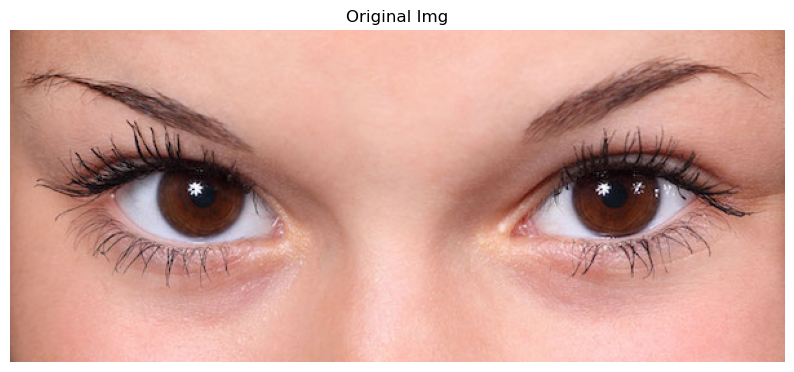

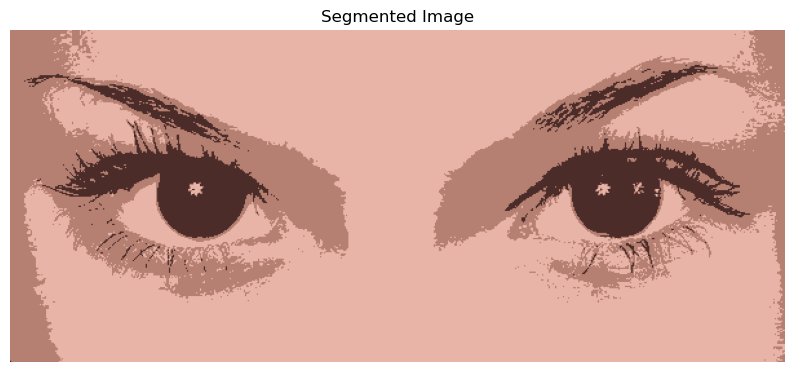

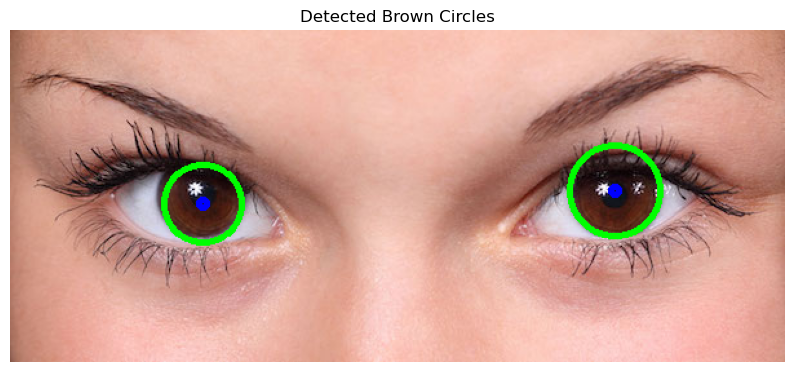

In [ ]:
# Read the image -----------------
img = cv2.imread('brown-eyes.jpg')
if img is None:
    print("Image not found.")
    exit()

# Reshape for k-means ---------------
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# K-means clustering -------------------
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to uint8 and reshape -----
centers = np.uint8(centers)
labels = labels.flatten()
labels = labels.reshape((img.shape[:2]))
segmented_img = centers[labels]

# Blur the segmented image ---------------
bluredImg = cv2.medianBlur(segmented_img, 9)

# Convert to grayscale -------------------
gray = cv2.cvtColor(bluredImg, cv2.COLOR_BGR2GRAY)

# Detect circles ------------------------ // dp: i've done some tests to evaluate this value -_-
circles = cv2.HoughCircles(gray, method=cv2.HOUGH_GRADIENT, dp=1.2542, minDist=30, 
                           param1=50, param2=30, minRadius=10, maxRadius=50)

# Draw Out -------------------------------
output_img = img.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        cv2.circle(output_img, center, radius, (0, 255, 0), 3)
        cv2.circle(output_img, center, 3, (255, 0, 0), 3)

# Display --------------------------------
displayImage(img, colored=1)
displayImage(segmented_img, "Segmented Image", colored=1)
displayImage(output_img, "Detected Brown Circles", colored=1)
